0. Import bibliotek

In [53]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

1. Wyświetlenie listy id produktów, o których zostały pobrane opinie

In [54]:
print(*[file.split(".")[0] for file in os.listdir("opinions")], sep="\n")

158841627
56354206
79242779;02514


2. Wczytanie kodu produktu, o którym mają zostać przeanalizowane opinie

In [55]:
product_id = input("Please enter the product code: ")
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(",", ".")).astype(float)
opinions

,opinion_id,author,recommend,stars,content,cons,pros,opinion_date,purchase_date,upvote,downvote
0,18256235,p...i,Polecam,4.5,Nie miałem problemu z przestawieniem się z mys...,[],[],2023-12-29 09:52:42,2023-12-23 13:14:56,0,0
1,15906062,Jarosław,None,3.0,zawiodłem się niestety (może za dużo sobie wyo...,[],[],2022-04-01 20:50:46,2022-03-26 12:07:21,0,3
2,10191252,Użytkownik Ceneo,None,3.0,Porównam MX Ergo do jego poprzednika - M570.\r...,[],[],2019-03-04 22:48:26,None,18,0
3,8588534,Toni,Polecam,4.5,Do codziennej pracy świetny. W niektórych prog...,[],[],2018-11-19 23:51:42,2018-11-14 11:31:21,2,0
4,10216677,Konrad,Polecam,4.0,Wolę trackball'e obsługiwane palcem środkowym ...,"[logitech flow nie działa, sterowanie kciukiem...","[bluetooth, kółko i środkowy przycisk, wygoda]",2019-03-09 11:15:44,None,3,0
5,18154708,p...i,Polecam,5.0,Najlepszy trackball na rynku. Mój drugi. Poprz...,[],"[bluetooth, ergonomia, kółko i środkowy przyci...",2023-11-30 07:53:14,2023-11-27 19:07:36,1,0
6,8703474,Użytkownik Ceneo,None,3.5,Brakuje precyzji. Trzeba się przyzwyczaić do t...,[],[wygląd],2018-12-09 23:16:54,2018-11-27 17:45:38,2,0
7,8739505,Użytkownik Ceneo,Polecam,5.0,"Bardzo dobry trackball, precyzyjny, wykonanie ...",[],"[ergonomia, precyzja, wygląd]",2018-12-14 13:32:52,2018-12-09 16:50:47,1,0
8,8950519,Witold,Polecam,5.0,Super! to już 3 generacja trackball od Logitec...,[],"[ergonomia, precyzja, wygląd]",2019-01-18 12:07:48,2019-01-08 09:28:15,0,1
9,8870218,Michał,Polecam,5.0,Idealne urządzenie dla osób spędzających całe ...,[],"[precyzja, wygląd]",2019-01-05 18:18:37,2018-12-06 09:21:38,1,1


3. Podstawowe statystyki

In [56]:
opinions_count = opinions.index.size
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_stars = opinions.stars.mean()



4. Histogram częstości ocen w opiniach

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '12')]

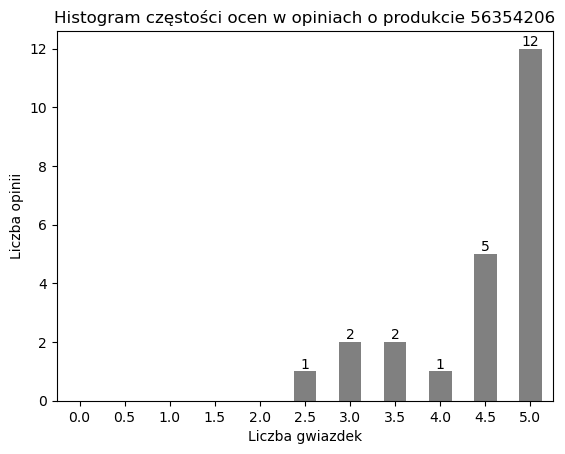

In [62]:
stars_distribution = opinions.stars.value_counts().reindex(np.arange(0, 5.5, 0.5))
ax = stars_distribution.plot.bar(color = "gray")
ax.set_title(f"Histogram częstości ocen w opiniach o produkcie {product_id}")
ax.set_xlabel("Liczba gwiazdek")
ax.set_ylabel("Liczba opinii")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda l: int(l) if l > 0 else "")

5. Wykres udziału rekomendacji w opiniach 

Text(0.5, 1.0, 'Udział rekomendacji w opiniach o produkcie 56354206')

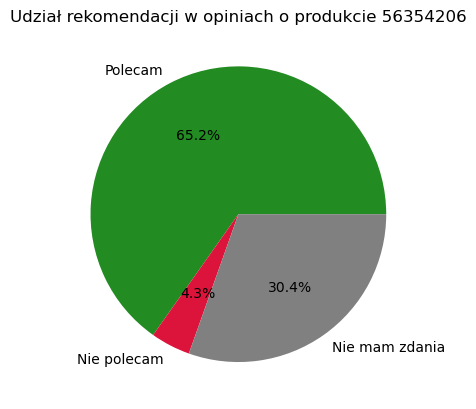

In [81]:
recommendations_distribution = opinions.recommend.value_counts(dropna = False).reindex(["Polecam", "Nie polecam", None])
recommendations_distribution.plot.pie(
    autopct = lambda p: f'{p:.1f}%' if p > 0 else '',
    label = "",
    colors = ["forestgreen", "crimson", "gray"],
    labels = ["Polecam", "Nie polecam", "Nie mam zdania"]
)
plt.title(f"Udział rekomendacji w opiniach o produkcie {product_id}")